In [1]:
# !apt install cm-super -q

In [2]:
# ! sudo apt-get install texlive-latex-recommended
# ! sudo apt-get install dvipng texlive-latex-extra texlive-fonts-recommended
# ! wget http://mirrors.ctan.org/macros/latex/contrib/type1cm.zip
# ! unzip type1cm.zip -d /tmp/type1cm
# ! cd /tmp/type1cm/type1cm/ && sudo latex type1cm.ins
# ! sudo mkdir /usr/share/texmf/tex/latex/type1cm
# ! sudo cp /tmp/type1cm/type1cm/type1cm.sty /usr/share/texmf/tex/latex/type1cm
# ! sudo texhash

## Plots

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

plt.rcParams['pdf.fonttype'] = 42
plt.rc('text', usetex=True)
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"

# mpl.rcParams.update(mpl.rcParamsDefault)

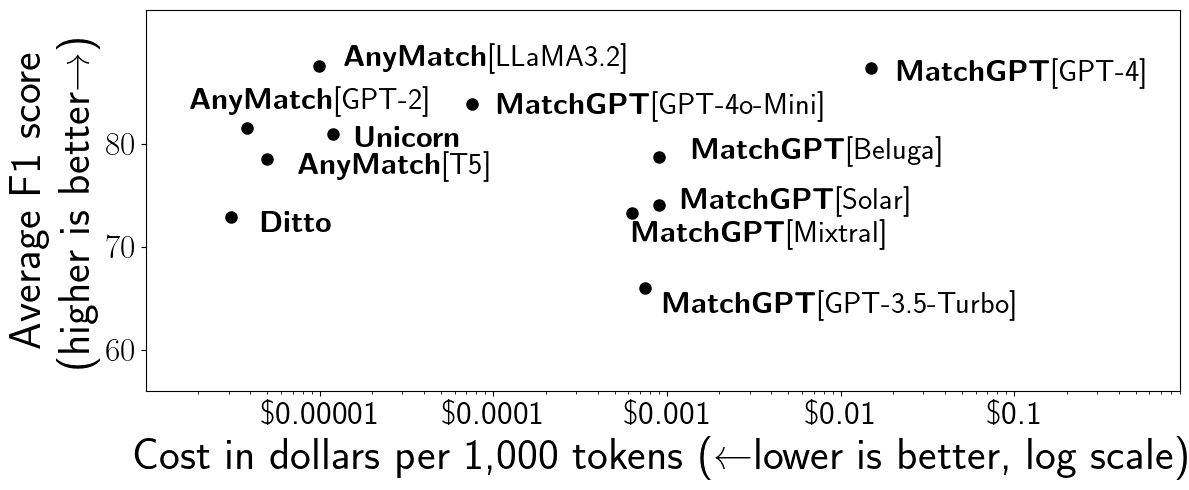

In [4]:
names = [r'\textbf{Ditto}', r'\textbf{Unicorn}', r'\textbf{AnyMatch}[GPT-2]', r'\textbf{AnyMatch}[T5]',
         r'\textbf{AnyMatch}[LLaMA3.2]', r'\textbf{MatchGPT}[Mixtral]', r'\textbf{MatchGPT}[Solar]', r'\textbf{MatchGPT}[Beluga]',
         r'\textbf{MatchGPT}[GPT-4o-Mini]', r'\textbf{MatchGPT}[GPT-3.5-Turbo]', r'\textbf{MatchGPT}[GPT-4]']

f1_scores = np.array([72.9, 80.95818182, 81.50181818, 78.56909091, 87.52363636,
       73.27272727, 74.03090909, 78.73454545, 83.86909091, 66.02909091,
       87.38181818])
costs = np.array([0.0000031, 0.000012, 0.0000038, 0.0000050, 0.0000099, 0.00063, 0.0009, 0.0009, 0.0000751, 0.000752, 0.015])

scatter_f1_cost_extras = [
    (0.0000015, -1.5), (0.000004, -1.3), (-0.000002, 1.8), (0.0000025, -1.5),
    (0.000004, 0), (0, -2.8), (0.0003, -0.4), (0.0005, -0.2),
    (0.00003, -1), (0.0002, -2.5), (0.006, -1.3)
]


ax = plt.gca()

for i, name in enumerate(names):
    color = 'black'

    x_extra, y_extra = scatter_f1_cost_extras[i]
    x_pos = costs[i] + x_extra
    y_pos = f1_scores[i] + y_extra


    ax.annotate(name, (x_pos, y_pos), fontsize=22, color=color)

plt.scatter(costs, f1_scores, edgecolor='black', color='black', s=64)

plt.ylabel("Average F1 score\n(higher is better→)", fontsize=32)
plt.ylim((56, 93))

plt.xlabel('Cost in dollars per 1,000 tokens (←lower is better, log scale)', fontsize=32)
plt.xscale('log')
plt.xlim((10**-6, 0.9))

ax.tick_params(axis='both', which='major', labelsize=24)
ax.set_xticks([10**-5, 10**-4, 10**-3, 10**-2, 10**-1])
ax.set_xticklabels(['\$0.00001', '\$0.0001', '\$0.001', '\$0.01', '\$0.1'])
ax.set_yticks([60, 70, 80])


plt.gcf().set_size_inches(12, 5)
plt.tight_layout()
# plt.gcf().savefig(f'teaser.pdf', dpi=300)
plt.show()

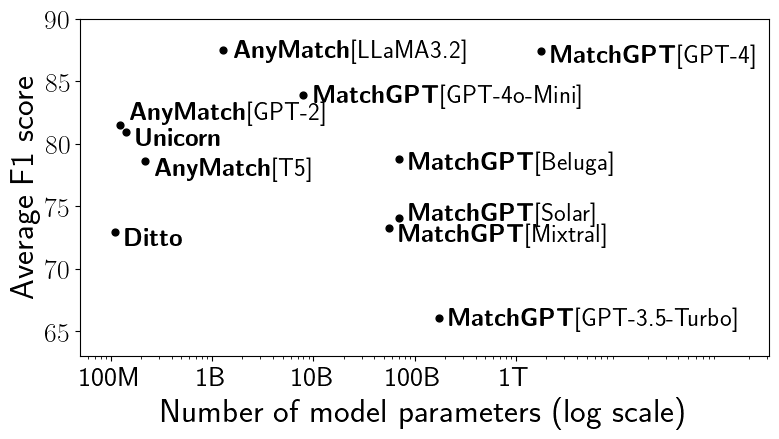

In [5]:
names = [r'\textbf{Ditto}', r'\textbf{Unicorn}', r'\textbf{AnyMatch}[GPT-2]', r'\textbf{AnyMatch}[T5]',
         r'\textbf{AnyMatch}[LLaMA3.2]', r'\textbf{MatchGPT}[Mixtral]', r'\textbf{MatchGPT}[Solar]', r'\textbf{MatchGPT}[Beluga]',
         r'\textbf{MatchGPT}[GPT-4o-Mini]', r'\textbf{MatchGPT}[GPT-3.5-Turbo]', r'\textbf{MatchGPT}[GPT-4]']

f1_scores = np.array([72.9, 80.95818182, 81.50181818, 78.56909091, 87.52363636,
       73.27272727, 74.03090909, 78.73454545, 83.86909091, 66.02909091,
       87.38181818])
params = np.array([110, 143, 124, 220, 1300, 56000, 70000, 70000, 8000, 175000, 1760000]) * 10**6


scatter_f1_size_extras = [
    (50 * 10**6, -0.5), (50 * 10**6, -0.5), (50 * 10**6, 1), (80 * 10**6, -0.5),
    (500 * 10**6, 0), (10000 * 10**6, -0.5), (30000 * 10**6, 0.4), (30000 * 10**6, -0.2),
    (3000 * 10**6, 0), (0, 0), (1000000 * 10**6, -0.3)
]

ax = plt.gca()
for i, name in enumerate(names):
    params_pos = 10**(np.log10(params[i]) + 0.1)

    x_extra, y_extra =  scatter_f1_size_extras[i]


    ax.annotate(name, (params_pos, f1_scores[i] - 0.55 + y_extra), fontsize=18, color='black')

plt.scatter(params, f1_scores, edgecolor='black', color='black', s=24)


plt.ylabel("Average F1 score", fontsize=24)
plt.ylim((63, 90))

plt.xlabel('Number of model parameters (log scale)', fontsize=24)
plt.xscale('log')
plt.xlim((10**7.7, 10**14.5))

ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xticks([10**8, 10**9, 10**10, 10**11, 10**12])
ax.set_xticklabels(['100M', '1B', '10B', '100B', '1T'])

plt.gcf().set_size_inches(8, 4.5)
plt.tight_layout()
# plt.gcf().savefig(f'f1-vs-size.pdf', dpi=300)
plt.show()

## Quantative Analysis


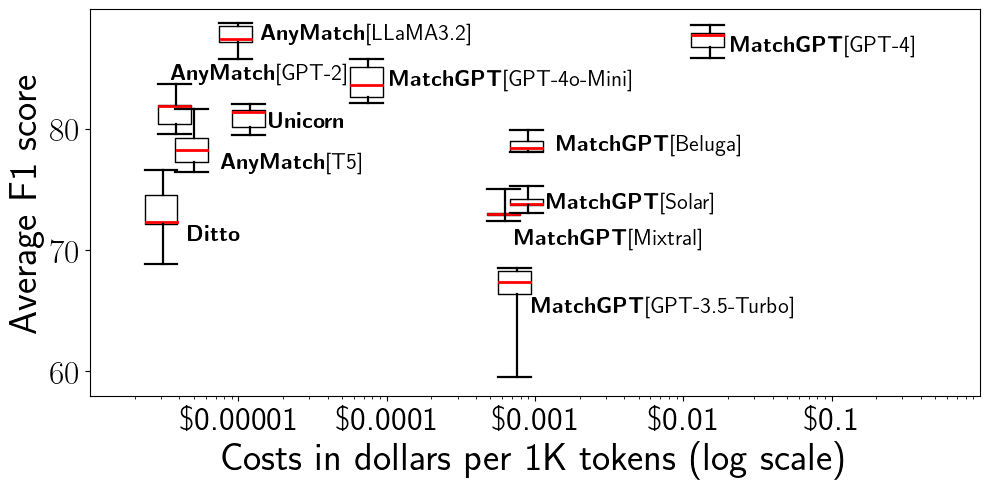

In [23]:
names = [r'\textbf{Ditto}', r'\textbf{Unicorn}', r'\textbf{AnyMatch}[GPT-2]', r'\textbf{AnyMatch}[T5]',
         r'\textbf{AnyMatch}[LLaMA3.2]', r'\textbf{MatchGPT}[Mixtral]', r'\textbf{MatchGPT}[Solar]', r'\textbf{MatchGPT}[Beluga]',
         r'\textbf{MatchGPT}[GPT-4o-Mini]', r'\textbf{MatchGPT}[GPT-3.5-Turbo]', r'\textbf{MatchGPT}[GPT-4]']

all_scores = np.array([
    [72.31818182, 76.64545455, 72.11818182, 68.86363636, 74.55454545],
    [80.18181818, 82.09090909, 81.42727273, 79.50909091, 81.58181818],
    [81.85454545, 79.56363636, 83.67272727, 82., 80.41818182],
    [76.40909091, 77.28181818, 78.24545455, 81.68181818, 79.22727273],
    [87.39090909, 88.75454545, 85.80909091, 87.18181818, 88.48181818],
    [73.07272727, 72.87272727, 75.02727273, 72.42727273, 72.96363636],
    [73.70909091, 73.07272727, 73.83636364, 74.24545455, 75.29090909],
    [78.97272727, 79.95454545, 78.40909091, 78.20909091, 78.12727273],
    [82.64545455, 82.17272727, 85.8, 83.62727273, 85.1],
    [68.30909091, 67.39090909, 66.38181818, 59.5, 68.56363636],
    [88.55454545, 85.89090909, 86.78181818, 87.95454545, 87.72727273]
])

costs = [
    0.0000031, 0.000012, 0.0000038, 0.0000050, 0.0000099,
    0.00063, 0.0009, 0.0009, 0.0000751, 0.000752, 0.015
]


quartiles = np.percentile(all_scores, [25, 50, 75], axis=1)
iqr = quartiles[2] - quartiles[0]
lower_whisker = quartiles[0] - 1.5 * iqr
upper_whisker = quartiles[2] + 1.5 * iqr

box_width = 0.5

ax = plt.gca()
for i, x in enumerate(costs):
    left = x * (1 - 0.25)
    right = x * (1 + 0.25)

    left_ = x * (1 - 0.235)
    right_ = x * (1 + 0.235)

    plt.fill_between([left, right],
                    [quartiles[0, i], quartiles[0, i]],
                    [quartiles[2, i], quartiles[2, i]],
                    color='white', edgecolor='black')
    plt.plot([left_, right_], [quartiles[1, i], quartiles[1, i]], color='red', linewidth=2)
    whisker_x = x
    plt.plot([whisker_x, whisker_x], [quartiles[0, i], np.min(all_scores[i])], 'k-', linewidth=1.6)
    plt.plot([whisker_x, whisker_x], [quartiles[2, i], np.max(all_scores[i])], 'k-', linewidth=1.6)

    cap_width = box_width * x * 0.5
    plt.plot([whisker_x - cap_width, whisker_x + cap_width], [np.min(all_scores[i]), np.min(all_scores[i])], 'k-', linewidth=1.6)
    plt.plot([whisker_x - cap_width, whisker_x + cap_width], [np.max(all_scores[i]), np.max(all_scores[i])], 'k-', linewidth=1.6)


names = [r'\textbf{Ditto}', r'\textbf{Unicorn}', r'\textbf{AnyMatch}[GPT-2]', r'\textbf{AnyMatch}[T5]',
         r'\textbf{AnyMatch}[LLaMA3.2]', r'\textbf{MatchGPT}[Mixtral]', r'\textbf{MatchGPT}[Solar]', r'\textbf{MatchGPT}[Beluga]',
         r'\textbf{MatchGPT}[GPT-4o-Mini]', r'\textbf{MatchGPT}[GPT-3.5-Turbo]', r'\textbf{MatchGPT}[GPT-4]']

box_f1_cost_extras = [
    (0.0000015, -1.5), (0.000004, -1.3), (-0.00000035, 2.25), (0.0000025, -1.5),
    (0.000004, 0), (0.0001, -2.5), (0.0003, -0.4), (0.0005, -0.2),
    (0.00003, 0), (0.0002, -2.5), (0.006, -1.3)
]
# Data
for i, name in enumerate(names):

  x_extra, y_extra = box_f1_cost_extras[i]
  ax.annotate(name, (costs[i] + x_extra, np.median(all_scores[i]) + y_extra), fontsize=16, color='black')

plt.ylabel("Average F1 score", fontsize=28)
plt.ylim((58, 89.9))

plt.xlabel('Costs in dollars per 1K tokens (log scale)', fontsize=28)
plt.xscale('log')
plt.xlim((10**-6, 1.0))

ax.tick_params(axis='both', which='major', labelsize=24)
ax.set_xticks([10**-5, 10**-4, 10**-3, 10**-2, 10**-1])
ax.set_xticklabels(['\$0.00001', '\$0.0001', '\$0.001', '\$0.01', '\$0.1'])



plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
# plt.gcf().savefig(f'f1-vs-cost.pdf', dpi=300)
plt.show()

In [1]:
import json
import numpy as np
import scipy.stats as stats
from scipy.stats import ttest_ind
import random
from scipy.stats import pearsonr, spearmanr

In [2]:
results = json.load(open('results.json', 'r'))
lms = ['ditto', 'unicorn', 'anymatch-gpt2', 'anymatch-t5', 'anymatch-llama3']

In [3]:
inter_f1s = []
intra_f1s = []

baseline_f1s = np.array(results['gpt3.5']).mean(axis=0)

for lm in lms:
  f1s = np.array(results[lm]) - baseline_f1s
  inter_f1s.append(f1s[:, 6:])
  intra_f1s.append(f1s[:, :6])

inter_f1s = np.array(inter_f1s)
intra_f1s = np.array(intra_f1s)

In [4]:
inter_f1s = inter_f1s.flatten()
intra_f1s = intra_f1s.flatten()
random.shuffle(intra_f1s)

In [5]:
# Significance level
alpha = 0.05

t_stat, p_value_two_tailed = ttest_ind(intra_f1s, inter_f1s, alternative='greater')

# Since we are testing "intra_f1s > inter_f1s", use the one-tailed p-value
p_value_one_tailed = p_value_two_tailed / 2 if t_stat > 0 else 1.0

# Significance level
alpha = 0.05

# Output results
print(f"T-statistic: {t_stat:.4f}")
print(f"One-tailed P-value: {p_value_one_tailed:.4f}")

if p_value_one_tailed < alpha:
    print("Reject the null hypothesis: intra_f1s is significantly greater than inter_f1s.")
else:
    print("Fail to reject the null hypothesis: intra_f1s is not significantly greater than inter_f1s.")

T-statistic: -8.8451
One-tailed P-value: 1.0000
Fail to reject the null hypothesis: intra_f1s is not significantly greater than inter_f1s.


In [6]:
rates = [1028/8054, 2250/7992, 2220/10143, 5347/23360, 110/836, 90/354, 1167/10293, 68/382, 132/407, 190/410, 962/9680]*5
slms = ['ditto', 'unicorn', 'anymatch-gpt2', 'anymatch-t5', 'anymatch-llama3']
llms = ['jellyfish', 'mixtral', 'solar', 'beluga', 'gpt4o-mini', 'gpt3.5', 'gpt4']

slm_f1s = []
llm_f1s = []
for key in slms+llms:
  method = key
  f1s = np.array(results[method]).flatten()
  spearman_corr, _ = spearmanr(rates, f1s)
  pearson_corr, _ = pearsonr(rates, f1s)
  print(f"the spearman correlation for {method} is {spearman_corr}")
  print(f"the pearson correlation for {method} is {pearson_corr}")

  if key in slms:
    slm_f1s.append(np.array(results[method]).flatten())

  else:
    llm_f1s.append(np.array(results[method]).flatten())

slm_f1s = np.array(slm_f1s).flatten()
llm_f1s = np.array(llm_f1s).flatten()
slm_spearman_corr, _ = spearmanr(rates*5, slm_f1s)
llm_spearman_corr, _ = spearmanr(rates*7, llm_f1s)

slm_pearson_corr, _ = pearsonr(rates*5, slm_f1s)
llm_pearson_corr, _ = pearsonr(rates*7, llm_f1s)

print(f"the spearman correlation for slm and llm are{slm_spearman_corr} and {llm_spearman_corr}")
print(f"the pearson correlation for slm and llm are{slm_pearson_corr} and {llm_pearson_corr}")


the spearman correlation for ditto is 0.005976358647914771
the pearson correlation for ditto is -0.009264019006611782
the spearman correlation for unicorn is 0.20430860472372672
the pearson correlation for unicorn is 0.18224385484932465
the spearman correlation for anymatch-gpt2 is 0.2867306676469706
the pearson correlation for anymatch-gpt2 is 0.2890983510774447
the spearman correlation for anymatch-t5 is 0.04890365538599842
the pearson correlation for anymatch-t5 is -0.05964030238104605
the spearman correlation for anymatch-llama3 is 0.17639668116979895
the pearson correlation for anymatch-llama3 is 0.1836731322190781
the spearman correlation for jellyfish is 0.10964968063897375
the pearson correlation for jellyfish is 0.01603685463646321
the spearman correlation for mixtral is 0.1461834189206081
the pearson correlation for mixtral is 0.21273421035632506
the spearman correlation for solar is 0.2109433069129975
the pearson correlation for solar is 0.23500389666355262
the spearman corr